In [2]:
# !pip3 install -r requirements.txt

In [3]:
import os

# Disable GPU usage and suppress warnings
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # Suppress TensorFlow logs

# Import TensorFlow and other libraries
import tensorflow as tf
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Explicitly disable GPU devices
tf.config.set_visible_devices([], 'GPU')

# Suppress absl logs
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# Verify TensorFlow is using CPU
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close     Close      High      Low      Open  \
Ticker                          NVDA      NVDA      NVDA     NVDA      NVDA   
Date                                                                          
2021-01-04 00:00:00+00:00  13.081203  13.11350  13.65250  12.9625  13.10425   
2021-01-05 00:00:00+00:00  13.371737  13.40475  13.44350  13.0870  13.09975   
2021-01-06 00:00:00+00:00  12.583431  12.61450  13.24500  12.5860  13.22250   
2021-01-07 00:00:00+00:00  13.311136  13.34400  13.37775  12.8865  12.96750   
2021-01-08 00:00:00+00:00  13.244051  13.27675  13.42100  13.0420  13.36250   

Price                         Volume  
Ticker                          NVDA  
Date                                  
2021-01-04 00:00:00+00:00  560640000  
2021-01-05 00:00:00+00:00  322760000  
2021-01-06 00:00:00+00:00  580424000  
2021-01-07 00:00:00+00:00  461480000  
2021-01-08 00:00:00+00:00  292528000  


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/37
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2948.0510 - mae: 40.8877 - val_loss: 2621.3752 - val_mae: 38.4102
Epoch 2/37
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3142.9778 - mae: 42.4927 - val_loss: 2541.4973 - val_mae: 37.6171
Epoch 3/37
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2854.1382 - mae: 40.2915 - val_loss: 2356.0146 - val_mae: 35.7232
Epoch 4/37
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2776.3381 - mae: 39.3869 - val_loss: 1977.2466 - val_mae: 31.5656
Epoch 5/37
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2360.2114 - mae: 35.0101 - val_loss: 1348.4507 - val_mae: 23.4677
Epoch 6/37
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1572.8954 - mae: 25.3073 - val_loss: 630.0328 - val_mae: 14.8976
Epoch 7/37
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 718.5035 - mae: 16.9833 - val_loss: 300.3855 - val_mae: 14.4229
Epoch 8/37
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 335.7979 - mae: 15.9599 - val_loss: 253.2352 - val_mae: 14.4085
Epoch 9/37


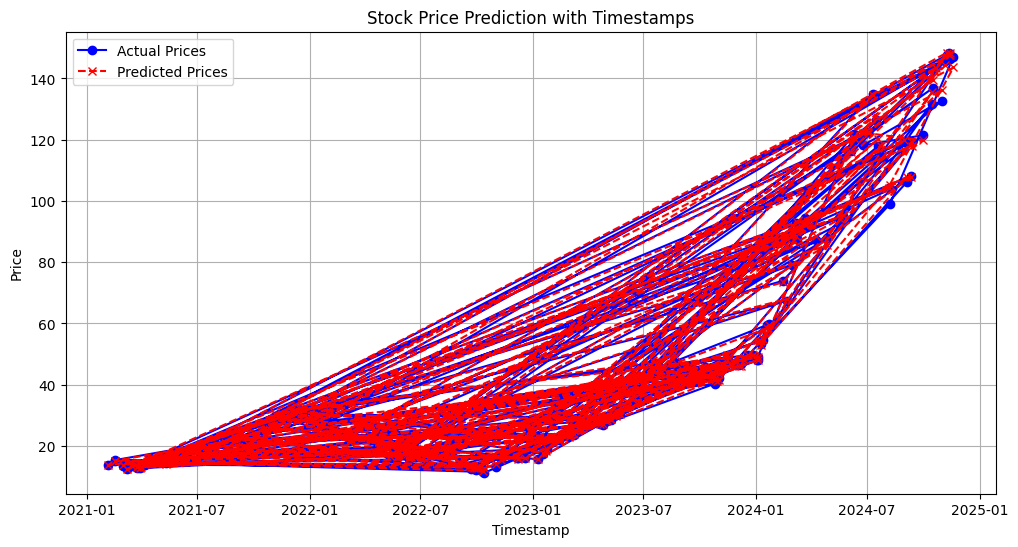

In [8]:
# Step 1: Fetch stock data
# Download stock data for a specific ticker
ticker = "NVDA"  # Example: NVDA stock
data = yf.download(ticker, start="2021-01-01", end="2024-11-21")

# Check the data
print(data.head())

# Step 2: Feature selection and preprocessing
# Use Open, High, Low, and Volume as features, and Close as the target
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Handle missing values (if any) without inplace modification
features = features.ffill()
target = target.ffill()

# Scale the features using MinMaxScaler for faster convergence
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split without unpacking indices directly
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

# Get test indices separately from the target
test_indices = y_test.index

# Convert targets to numpy arrays for TensorFlow
y_train = np.array(y_train)
y_test = np.array(y_test)

# Step 4: Build the ANN model
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Specify the input shape
    Dense(64, activation='relu'),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model, can modify the learning_rate change results...
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=37, batch_size=32, validation_split=0.2, verbose=1)

# Step 6: Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Visualize the predictions vs. actual values
import matplotlib.pyplot as plt

# Predict on the test set
predictions = model.predict(X_test)

# Convert test indices to datetime for x-axis
test_dates = pd.to_datetime(test_indices)

# Visualize the predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test, label='Actual Prices', color='blue', linestyle='-', marker='o')
plt.plot(test_dates, predictions, label='Predicted Prices', color='red', linestyle='--', marker='x')
plt.title("Stock Price Prediction with Timestamps")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
